In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
BASE_DIR = './17FlowerOxfordDataset'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
train_generator = datagen.flow_from_directory(
    BASE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 1280 images belonging to 16 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    BASE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 320 images belonging to 16 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_generator = test_datagen.flow_from_directory(
    BASE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 159 images belonging to 16 classes.


In [7]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [8]:
for layer in vgg16_base.layers:
    layer.trainable = False
        
x = Flatten()(vgg16_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

In [9]:
model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,141,584 (80.65 MB)

 Trainable params: 6,426,896 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [12]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

c:\Users\Angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1477 - loss: 2.7906

c:\Users\Angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.1491 - loss: 2.7850 - val_accuracy: 0.3844 - val_loss: 2.0920
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.3445 - loss: 2.0784 - val_accuracy: 0.5531 - val_loss: 1.7139
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.4586 - loss: 1.7110 - val_accuracy: 0.6250 - val_loss: 1.4783
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.5264 - loss: 1.4958 - val_accuracy: 0.6625 - val_loss: 1.3163
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.5816 - loss: 1.3498 - val_accuracy: 0.6531 - val_loss: 1.2112
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.6139 - loss: 1.2641 - val_accuracy: 0.7094 - val_loss: 1.0702
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.6755 - loss: 1.1035 - val_accuracy: 0.7531 - val_loss: 1.0254
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 203s 5s/step - accuracy: 0.6758 - loss: 1.1080 - val_accuracy: 0.7625 - val_loss: 0.

In [13]:
print(f"Train Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")

Train Accuracy: 80.78%


In [22]:
print(f"Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

Validation Accuracy: 79.69%


In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8083 - loss: 0.8307
Test Accuracy: 84.28%


In [15]:
# model.save('vgg16.h5')    

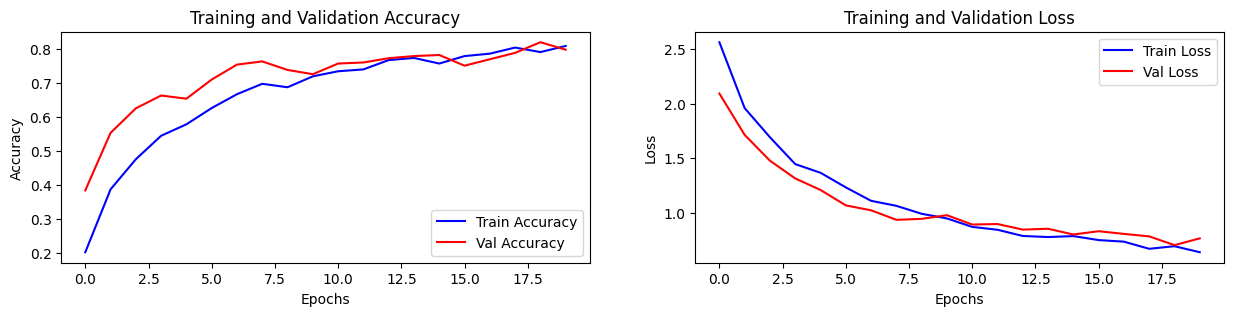

In [33]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='b')
plt.plot(history.history['val_loss'], label='Val Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.savefig('training_history.png')
plt.show()

In [25]:
y_pred_probabilities = model.predict(test_generator, verbose=1)

y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step


In [26]:
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

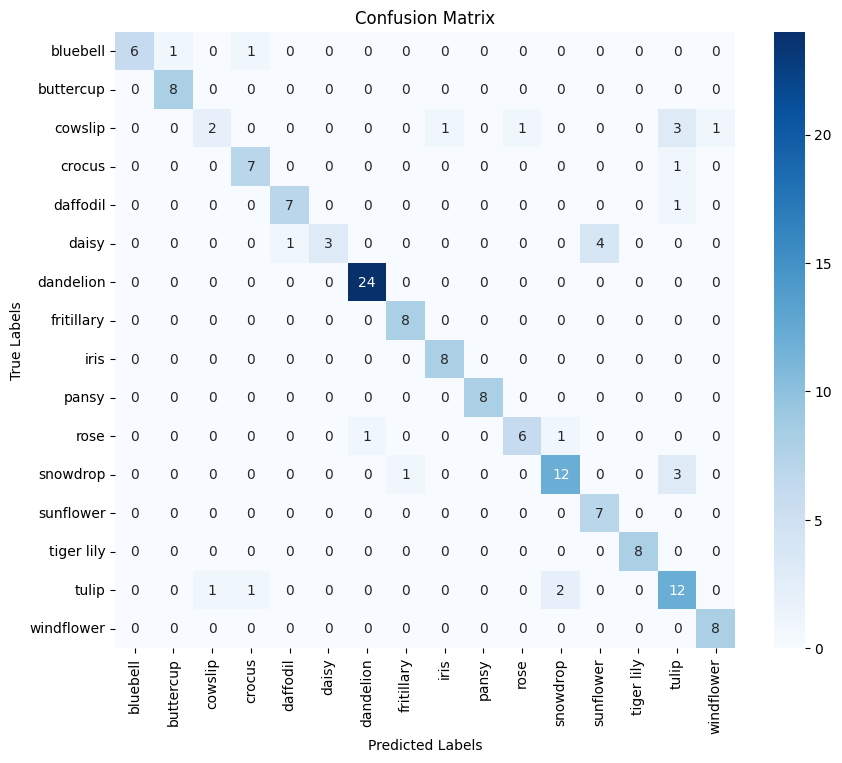

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('vgg16-confusioinmatrix.png')
plt.show()

In [28]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

    bluebell       1.00      0.75      0.86         8
   buttercup       0.89      1.00      0.94         8
     cowslip       0.67      0.25      0.36         8
      crocus       0.78      0.88      0.82         8
    daffodil       0.88      0.88      0.88         8
       daisy       1.00      0.38      0.55         8
   dandelion       0.96      1.00      0.98        24
  fritillary       0.89      1.00      0.94         8
        iris       0.89      1.00      0.94         8
       pansy       1.00      1.00      1.00         8
        rose       0.86      0.75      0.80         8
    snowdrop       0.80      0.75      0.77        16
   sunflower       0.64      1.00      0.78         7
  tiger lily       1.00      1.00      1.00         8
       tulip       0.60      0.75      0.67        16
  windflower       0.89      1.00      0.94         8

    accuracy                           0.84       159
   

In [17]:
# Extract class indices and reverse the mapping
class_indices = train_generator.class_indices
classes = {v: k for k, v in class_indices.items()}

In [18]:
def preprocess_input_image(img_path):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0
    return img_array

In [19]:
def predict_flower(img_path, model):
    img_array = preprocess_input_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    flower_name = classes[predicted_class_idx]  # Map index to flower name

    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted Flower: {flower_name}")
    plt.show()

    return flower_name

In [24]:
# img_path = './tes-17/bluebell1.jpg'
# predicted_flower = predict_flower(img_path, model)
# print(f"The predicted flower is: {predicted_flower}")